### Extracting and Visualizing Stock Data

In [6]:
!pip install bs4
!pip install requests
!pip install nbformat
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 53.2 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 5.8 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138891 sha256=1832479671645cbd60624217cc2cd580cf7f9bb29f80565bc4a55761217529e9
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/1c/09/7e/9f659fde248ecdc1722a142c1d744271aad3914a0afc191058
Successfully built peewee


In [8]:
import yfinance as yf
from bs4 import BeautifulSoup
import pandas as pd
import requests
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [11]:
import warnings
# ignore all warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [12]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

### Question 1: Use yfinance to Extract Stock Data

###### Using the **Ticker** function enter the ticker symbol of the stock we want to extract data on to create a ticker object. the stock is **Tesla** and **Ticker** Symbol is **TSLA**

In [37]:
tesla = yf.Ticker("TSLA")

###### Using the Ticker object and the function **history** extract stock information and save it in a dataframe named **tesla_data**. set the **period** parameter to **"max"** so we get the information for the maximum amount of time.

In [38]:
tesla_data = tesla.history(period='max')

###### **Reset the index** using the reset_index(inplace=True) function on the tesla_data DataFrame and display first five rows of the **tesla_data** dataframe using the **head** function. take a screenshots of the result and code from the beggining of the Question 1 to the result below.

In [39]:
tesla_data.reset_index(inplace=True)

In [40]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### Question 2: Use Webscraping To Extract Tesla Revenue Data

###### Use the **requests** to dounload the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm save the text of the response as a variable named html_data.

In [55]:
html_data = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

###### Parse the html data using **beautiful_soup** using parser i.e **html5lib** or **html.parser** make sure to use the **html_data** with the content parameter as follow **html_data.content**.

In [57]:
data = requests.get(html_data).text

In [60]:
soup = BeautifulSoup(data, 'html5lib')

###### Using **BeautifulSoup** or the **read_html** function extract the table with **Tesla Revenue** and store it into a a dataframe named **tesla_revenue**. the dataframe should have columns **Date** and **revenue**

In [66]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [71]:
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all('td')
    date = col[0].text
    revenue = col[1].text

    tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

###### Execute the following line to remove the comma and dollar sign from the **Revenue** column.

In [74]:
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',|\$',"", regex=True)

###### Execute the following lines to remove a null or empty strings in the Revenue column

In [75]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

###### Display the last 5 rows of the tesla_revenue dataframe using the tail function. Take a screenshot of the result.

In [76]:
tesla_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


### Question 3: Use yfinance to Extract stock Data

##### Using the **Ticker** function enter the ticker symbol of the stock we want to extraxt data on  to create a ticker object the stock is a **GameStop** and its ticker symbol is **GME**.

In [78]:
GameStop = yf.Ticker("GME")

###### Using the ticker object and the function **history** extract stock information and save it in a dataframe named **gme_data**. Set the **period** parameter to **"max"** so we get information for the maximum amount of the time.

In [80]:
game_data = GameStop.history(period="max")
game_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-05 00:00:00-04:00,22.000000,22.680000,21.660000,22.389999,5101200,0.0,0.0
2024-09-06 00:00:00-04:00,22.400000,24.480000,21.799999,23.920000,23884000,0.0,0.0
2024-09-09 00:00:00-04:00,23.240000,25.020000,23.160000,24.250000,14064700,0.0,0.0


###### **Reset the index** using the reset_index(inplace=True) function on the game_data DataFrame and display the first 5 rows of the **game_data** dataframe using the **head** function. take a screenshot of the result and code from the beggining of the Question 3 to the result below.

In [81]:
game_data.reset_index(inplace=True)

In [83]:
game_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


### Question 4: Use Webscraping to Extract GME Revenue Data.

###### Use thr requests library to dounload the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable name **html_data_2**.

In [84]:
html_data_2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [88]:
data = requests.get(html_data_2).text

###### Parse the html data using **beautifulsoup** using parser i.e **html5lib** or **html.parser**.

In [91]:
soup = BeautifulSoup(data, 'html5lib')

###### Using the **BeautifulSoup** or **read_html** function extract the table with **GameStop Revenue** and store it into a dataframe named **gme_revenue**. the dataframe should have columns of **Date** and **Revenue**. Make sure the dollar and comma sign is removed from **Revenue** column.

In [95]:
gme_revenue = pd.DataFrame(columns = ["Date", "Revenue"])

In [100]:
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all('td')
    date = col[0].text
    revenue = col[1].text

    gme_revenue = pd.concat([gme_revenue,pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)

###### Execute the following line to remove comma and dollar sign from the **Revenue** column.

In [103]:
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',|\$',"", regex=True)

###### Execute the following an null or empty strings in the Revenue column

In [110]:
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] !=""]

###### Display the last five rows of the game_revenue dataframe using the tail function. Take screenshot of the result.

In [111]:
gme_revenue.tail()

,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


### Question 5: Plot Tesla Stock Grapth

###### Use the make_graoh function to graph the Tesla Stock Data, also provide title for the graph, Note the graph will only show data upto june 2021.

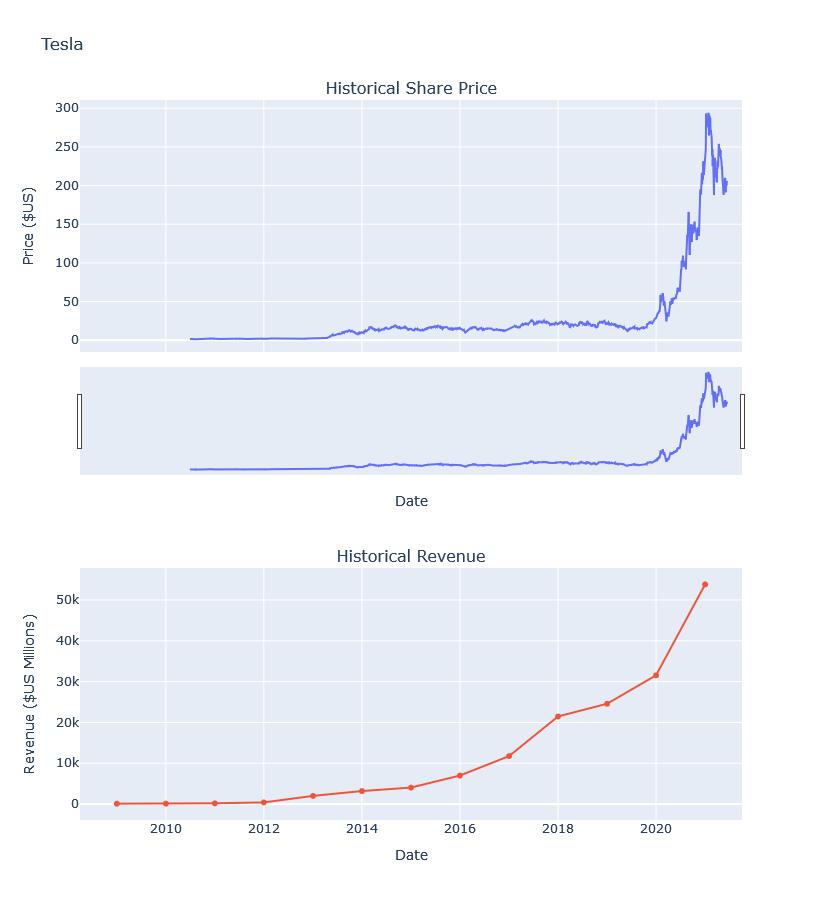

In [117]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

### Question 6: Plot the GameStop Stock Graph.

###### Use the **make_graph** function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the **make_graph** function is **make_graph(gme_data, gme_revenue, 'GameStop')**. Note the graph will only show data upto June 2021.

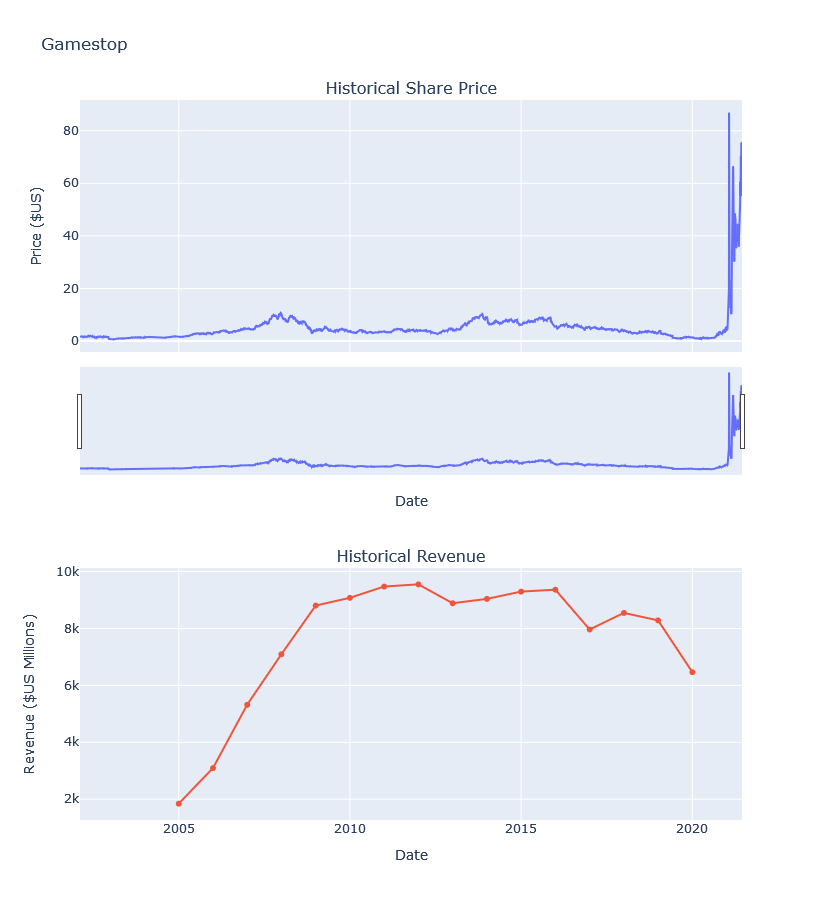

In [120]:
make_graph(game_data, gme_revenue, 'Gamestop')